# GPU Check

In [ ]:
import GPUtil
GPUs = GPUtil.getGPUs()
for gpu in GPUs:
  print(gpu.name, gpu.memoryTotal)

# Imports

In [1]:
from search_eval.eval_OneShot import Eval_OS
from search_eval.optimizer.SingleImageDataset import SingleImageDataset
from search_eval.utils.common_utils import *
from search_space.search_space import DARTS_UNet

from nni import trace
import nni.retiarii.strategy as strategy
import nni.retiarii.serializer as serializer

from nni.retiarii.experiment.pytorch import RetiariiExperiment, RetiariiExeConfig
from nni.retiarii.evaluator.pytorch import Lightning, Trainer
from nni.retiarii.evaluator.pytorch.lightning import DataLoader
from nni.retiarii.strategy import DARTS as DartsStrategy

import torch

torch.cuda.empty_cache()
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
print('CUDA available: {}'.format(torch.cuda.is_available()))

CUDA available: True


# Strategy

In [2]:
# Select the Search Strategy
strategy = DartsStrategy()
# strategy = strategy.DartsStrategy()
# strategy = strategy.ENAS()
# strategy = strategy.GumbelDARTS()
# strategy = strategy.RandomOneShot()

# oneshot

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type    | Params
----------------------------------
0 | model | Eval_OS | 156 M 
----------------------------------
156 M     Trainable params
0         Non-trainable params
156 M     Total params
627.407   Total estimated model params size (MB)
/home/joe/.cache/pypoetry/virtualenvs/nas-test-OHy8kATa-py3.8/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/joe/.cache/pypoetry/virtualenvs/nas-test-OHy8kATa-py3.8/lib/python3.8/site-packages/pytorch_lightning/traine

Training: 0it [00:00, ?it/s]

/home/joe/.cache/pypoetry/virtualenvs/nas-test-OHy8kATa-py3.8/lib/python3.8/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


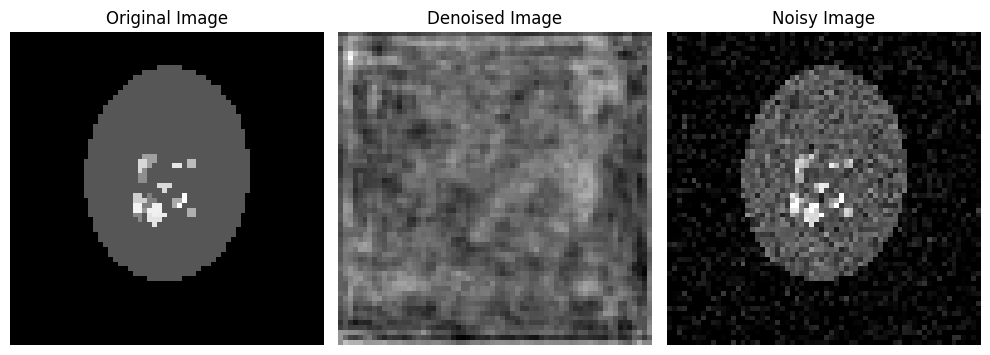

[2023-09-06 04:38:16] Intermediate result: {"iteration": 0, "loss": 0.05911, "psnr_gt": 11.91351}  (Index 0)
[2023-09-06 04:38:21] Intermediate result: {"iteration": 25, "loss": 0.18626, "psnr_gt": 7.74855}  (Index 1)
[2023-09-06 04:38:23] Intermediate result: {"iteration": 50, "loss": 0.04399, "psnr_gt": 13.13544}  (Index 2)
[2023-09-06 04:38:26] Intermediate result: {"iteration": 75, "loss": 0.01611, "psnr_gt": 19.83629}  (Index 3)
[2023-09-06 04:38:29] Intermediate result: {"iteration": 100, "loss": 0.01011, "psnr_gt": 20.49617, "var": 0.30142}  (Index 4)
[2023-09-06 04:38:32] Intermediate result: {"iteration": 125, "loss": 0.00867, "psnr_gt": 22.60672, "var": 0.01864}  (Index 5)
[2023-09-06 04:38:35] Intermediate result: {"iteration": 150, "loss": 0.00824, "psnr_gt": 22.31352, "var": 0.00343}  (Index 6)
[2023-09-06 04:38:38] Intermediate result: {"iteration": 175, "loss": 0.00803, "psnr_gt": 22.75158, "var": 0.00083}  (Index 7)


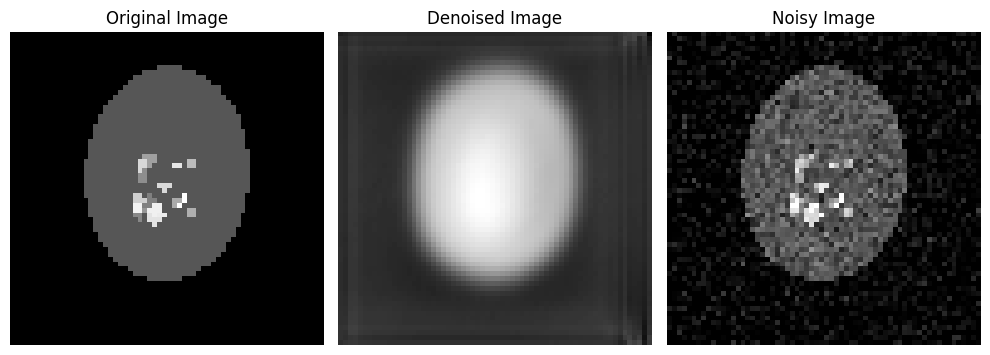

[2023-09-06 04:38:41] Intermediate result: {"iteration": 200, "loss": 0.00786, "psnr_gt": 22.82326, "var": 0.00024}  (Index 8)
[2023-09-06 04:38:44] Intermediate result: {"iteration": 225, "loss": 0.00772, "psnr_gt": 22.94662, "var": 8e-05}  (Index 9)
[2023-09-06 04:38:47] Intermediate result: {"iteration": 250, "loss": 0.00761, "psnr_gt": 23.05571, "var": 3e-05}  (Index 10)
[2023-09-06 04:38:50] Intermediate result: {"iteration": 275, "loss": 0.00751, "psnr_gt": 23.19557, "var": 2e-05}  (Index 11)
[2023-09-06 04:38:53] Intermediate result: {"iteration": 300, "loss": 0.00742, "psnr_gt": 23.28357, "var": 1e-05}  (Index 12)
[2023-09-06 04:38:56] Intermediate result: {"iteration": 325, "loss": 0.00735, "psnr_gt": 23.35837, "var": 1e-05}  (Index 13)
[2023-09-06 04:38:59] Intermediate result: {"iteration": 350, "loss": 0.00728, "psnr_gt": 23.43685, "var": 1e-05}  (Index 14)
[2023-09-06 04:39:02] Intermediate result: {"iteration": 375, "loss": 0.00722, "psnr_gt": 23.50813, "var": 1e-05}  (In

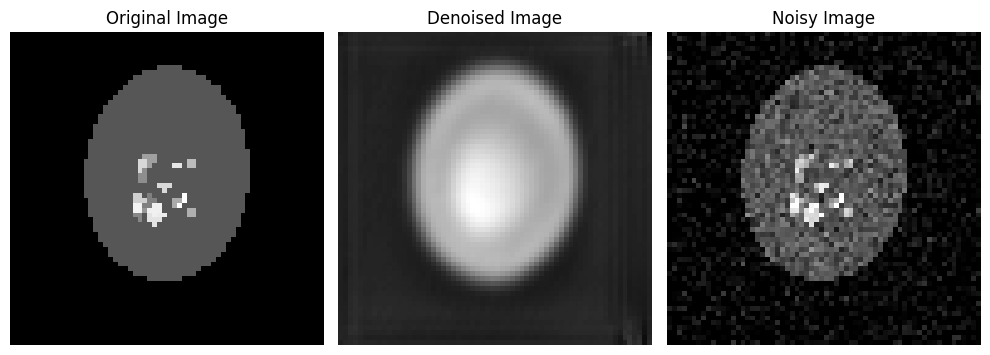

[2023-09-06 04:39:06] Intermediate result: {"iteration": 400, "loss": 0.00718, "psnr_gt": 23.55662, "var": 1e-05}  (Index 16)
[2023-09-06 04:39:09] Intermediate result: {"iteration": 425, "loss": 0.00711, "psnr_gt": 23.64599, "var": 1e-05}  (Index 17)
[2023-09-06 04:39:12] Intermediate result: {"iteration": 450, "loss": 0.00706, "psnr_gt": 23.69006, "var": 1e-05}  (Index 18)
[2023-09-06 04:39:14] Intermediate result: {"iteration": 475, "loss": 0.00702, "psnr_gt": 23.72933, "var": 1e-05}  (Index 19)
[2023-09-06 04:39:18] Intermediate result: {"iteration": 500, "loss": 0.00698, "psnr_gt": 23.77455, "var": 1e-05}  (Index 20)
[2023-09-06 04:39:20] Intermediate result: {"iteration": 525, "loss": 0.00695, "psnr_gt": 23.81281, "var": 1e-05}  (Index 21)
[2023-09-06 04:39:23] Intermediate result: {"iteration": 550, "loss": 0.00689, "psnr_gt": 23.88987, "var": 1e-05}  (Index 22)
[2023-09-06 04:39:26] Intermediate result: {"iteration": 575, "loss": 0.00687, "psnr_gt": 23.87981, "var": 1e-05}  (In

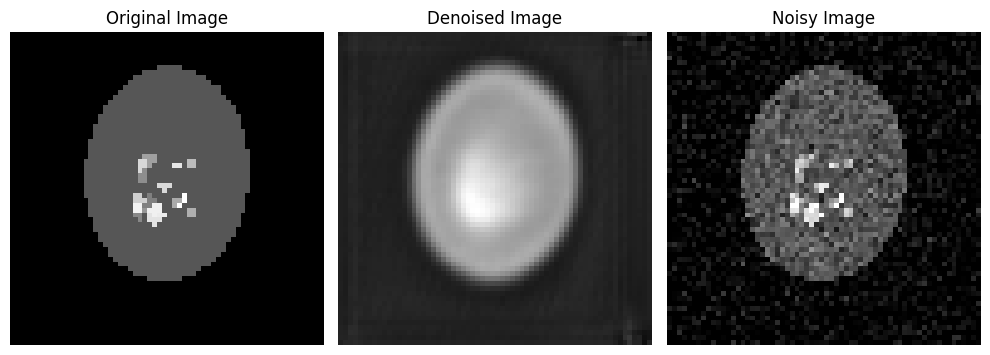

[2023-09-06 04:39:30] Intermediate result: {"iteration": 600, "loss": 0.00683, "psnr_gt": 23.94909, "var": 1e-05}  (Index 24)
[2023-09-06 04:39:33] Intermediate result: {"iteration": 625, "loss": 0.00677, "psnr_gt": 24.00198, "var": 1e-05}  (Index 25)
[2023-09-06 04:39:35] Intermediate result: {"iteration": 650, "loss": 0.00674, "psnr_gt": 24.02296, "var": 1e-05}  (Index 26)
[2023-09-06 04:39:38] Intermediate result: {"iteration": 675, "loss": 0.00672, "psnr_gt": 24.02166, "var": 1e-05}  (Index 27)
[2023-09-06 04:39:41] Intermediate result: {"iteration": 700, "loss": 0.0067, "psnr_gt": 24.07799, "var": 1e-05}  (Index 28)
[2023-09-06 04:39:44] Intermediate result: {"iteration": 725, "loss": 0.00658, "psnr_gt": 24.17754, "var": 1e-05}  (Index 29)
[2023-09-06 04:39:47] Intermediate result: {"iteration": 750, "loss": 0.00658, "psnr_gt": 24.15889, "var": 1e-05}  (Index 30)
[2023-09-06 04:39:50] Intermediate result: {"iteration": 775, "loss": 0.00651, "psnr_gt": 24.28661, "var": 2e-05}  (Ind

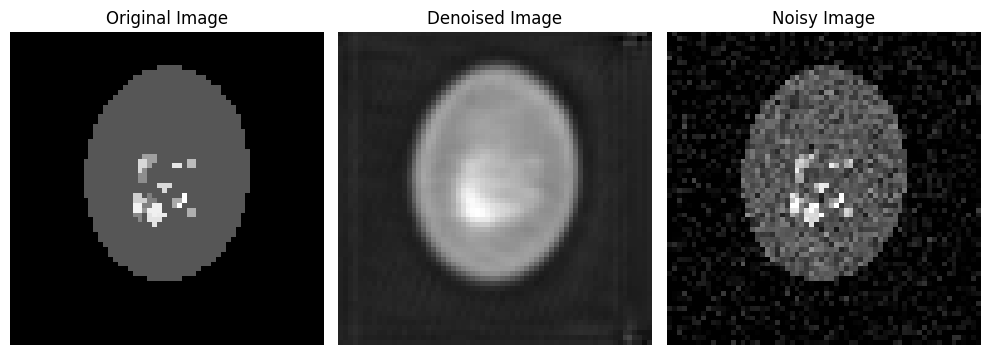

[2023-09-06 04:39:54] Intermediate result: {"iteration": 800, "loss": 0.00651, "psnr_gt": 24.19615, "var": 2e-05}  (Index 32)
[2023-09-06 04:39:57] Intermediate result: {"iteration": 825, "loss": 0.00647, "psnr_gt": 24.34741, "var": 3e-05}  (Index 33)
[2023-09-06 04:40:00] Intermediate result: {"iteration": 850, "loss": 0.00644, "psnr_gt": 24.22556, "var": 3e-05}  (Index 34)
[2023-09-06 04:40:03] Intermediate result: {"iteration": 875, "loss": 0.00634, "psnr_gt": 24.47109, "var": 4e-05}  (Index 35)
[2023-09-06 04:40:06] Intermediate result: {"iteration": 900, "loss": 0.00625, "psnr_gt": 24.41003, "var": 5e-05}  (Index 36)
[2023-09-06 04:40:08] Intermediate result: {"iteration": 925, "loss": 0.00623, "psnr_gt": 24.38538, "var": 6e-05}  (Index 37)
[2023-09-06 04:40:11] Intermediate result: {"iteration": 950, "loss": 0.00664, "psnr_gt": 24.1674, "var": 0.00011}  (Index 38)
[2023-09-06 04:40:14] Intermediate result: {"iteration": 975, "loss": 0.00638, "psnr_gt": 24.30561, "var": 0.00014}  

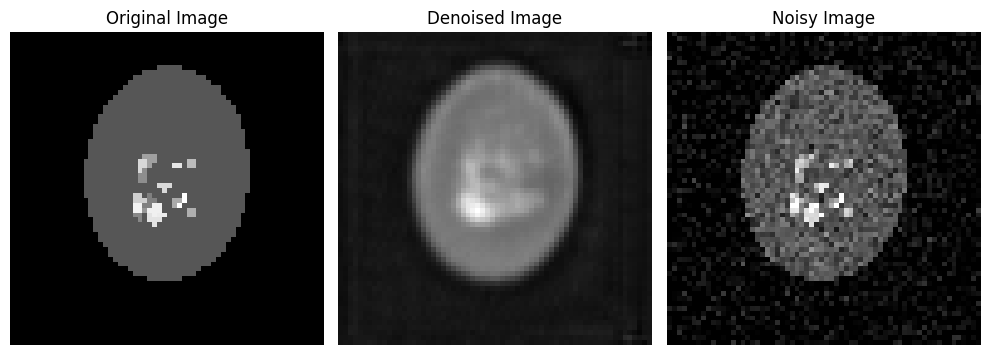

[2023-09-06 04:40:18] Intermediate result: {"iteration": 1000, "loss": 0.0062, "psnr_gt": 24.49875, "var": 0.00015}  (Index 40)
[2023-09-06 04:40:20] Intermediate result: {"iteration": 1025, "loss": 0.00631, "psnr_gt": 24.61003, "var": 0.00017}  (Index 41)
[2023-09-06 04:40:23] Intermediate result: {"iteration": 1050, "loss": 0.0061, "psnr_gt": 24.92255, "var": 0.00014}  (Index 42)
[2023-09-06 04:40:26] Intermediate result: {"iteration": 1075, "loss": 0.00605, "psnr_gt": 24.71004, "var": 0.00012}  (Index 43)
[2023-09-06 04:40:29] Intermediate result: {"iteration": 1100, "loss": 0.006, "psnr_gt": 24.68117, "var": 0.00012}  (Index 44)
[2023-09-06 04:40:32] Intermediate result: {"iteration": 1125, "loss": 0.00612, "psnr_gt": 24.20281, "var": 0.00012}  (Index 45)
[2023-09-06 04:40:35] Intermediate result: {"iteration": 1150, "loss": 0.00591, "psnr_gt": 24.77307, "var": 0.00012}  (Index 46)
[2023-09-06 04:40:38] Intermediate result: {"iteration": 1175, "loss": 0.00587, "psnr_gt": 25.06595, 

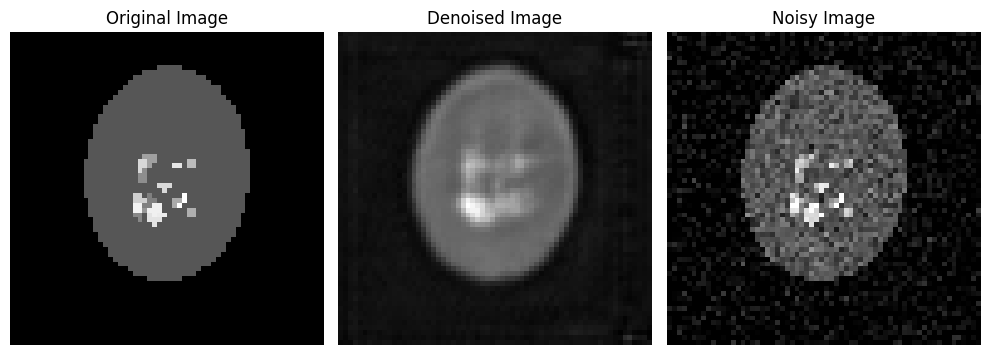

[2023-09-06 04:40:41] Intermediate result: {"iteration": 1200, "loss": 0.00567, "psnr_gt": 25.00811, "var": 0.00011}  (Index 48)
[2023-09-06 04:40:44] Intermediate result: {"iteration": 1225, "loss": 0.00553, "psnr_gt": 25.06776, "var": 0.00011}  (Index 49)
[2023-09-06 04:40:47] Intermediate result: {"iteration": 1250, "loss": 0.00547, "psnr_gt": 25.04648, "var": 0.00012}  (Index 50)
[2023-09-06 04:40:50] Intermediate result: {"iteration": 1275, "loss": 0.00548, "psnr_gt": 25.01713, "var": 0.00013}  (Index 51)
[2023-09-06 04:40:53] Intermediate result: {"iteration": 1300, "loss": 0.0055, "psnr_gt": 25.47701, "var": 0.00015}  (Index 52)
[2023-09-06 04:40:56] Intermediate result: {"iteration": 1325, "loss": 0.00539, "psnr_gt": 25.39937, "var": 0.00015}  (Index 53)
[2023-09-06 04:40:59] Intermediate result: {"iteration": 1350, "loss": 0.0053, "psnr_gt": 25.34486, "var": 0.00016}  (Index 54)
[2023-09-06 04:41:02] Intermediate result: {"iteration": 1375, "loss": 0.00526, "psnr_gt": 24.63393

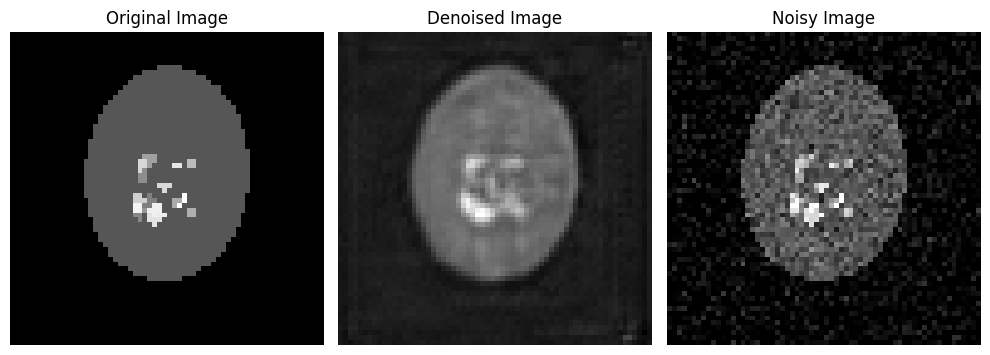

[2023-09-06 04:41:05] Intermediate result: {"iteration": 1400, "loss": 0.00504, "psnr_gt": 25.30425, "var": 0.0002}  (Index 56)
[2023-09-06 04:41:08] Intermediate result: {"iteration": 1425, "loss": 0.00501, "psnr_gt": 25.38491, "var": 0.00023}  (Index 57)
[2023-09-06 04:41:11] Intermediate result: {"iteration": 1450, "loss": 0.00481, "psnr_gt": 25.54104, "var": 0.00025}  (Index 58)
[2023-09-06 04:41:14] Intermediate result: {"iteration": 1475, "loss": 0.00481, "psnr_gt": 25.8649, "var": 0.00026}  (Index 59)
[2023-09-06 04:41:17] Intermediate result: {"iteration": 1500, "loss": 0.0046, "psnr_gt": 25.86777, "var": 0.00029}  (Index 60)


Burn-in completed at iter 1503; 
Starting SGLD Mean sampling;


[2023-09-06 04:41:20] Intermediate result: {"iteration": 1525, "loss": 0.00438, "psnr_gt": 25.84824, "psnr": 26.09877}  (Index 61)


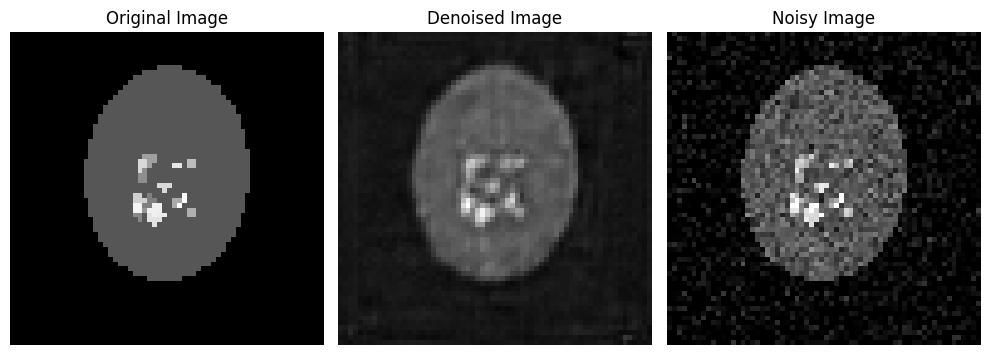

[2023-09-06 04:41:24] Intermediate result: {"iteration": 1550, "loss": 0.00422, "psnr_gt": 25.68774, "psnr": 26.15127}  (Index 62)
[2023-09-06 04:41:26] Intermediate result: {"iteration": 1575, "loss": 0.00433, "psnr_gt": 25.50803, "psnr": 26.20569}  (Index 63)


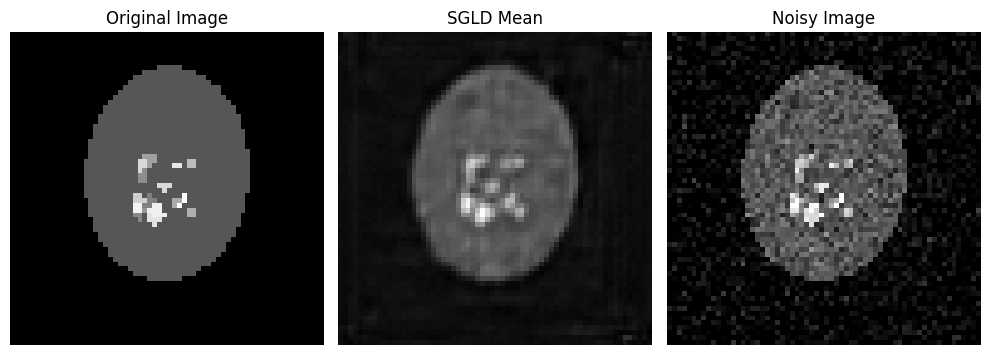

[2023-09-06 04:41:30] Intermediate result: {"iteration": 1600, "loss": 0.00402, "psnr_gt": 25.89611, "psnr": 26.22006}  (Index 64)
[2023-09-06 04:41:33] Intermediate result: {"iteration": 1625, "loss": 0.00385, "psnr_gt": 25.77569, "psnr": 26.25562}  (Index 65)


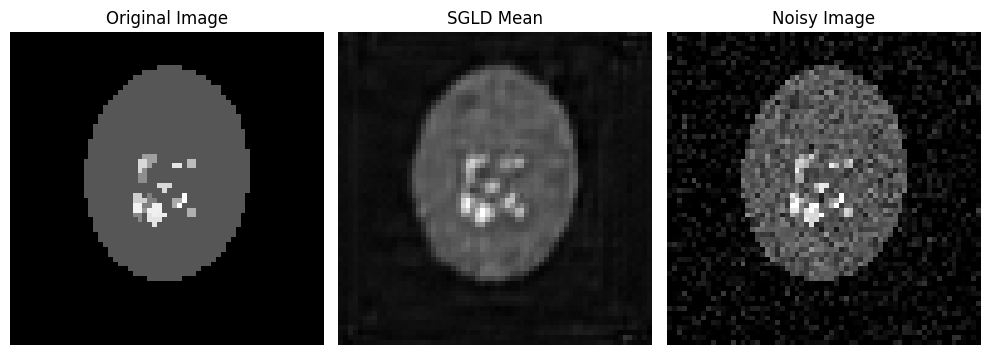

[2023-09-06 04:41:36] Intermediate result: {"iteration": 1650, "loss": 0.00376, "psnr_gt": 25.90709, "psnr": 26.28253}  (Index 66)
[2023-09-06 04:41:39] Intermediate result: {"iteration": 1675, "loss": 0.00367, "psnr_gt": 25.7685, "psnr": 26.31519}  (Index 67)


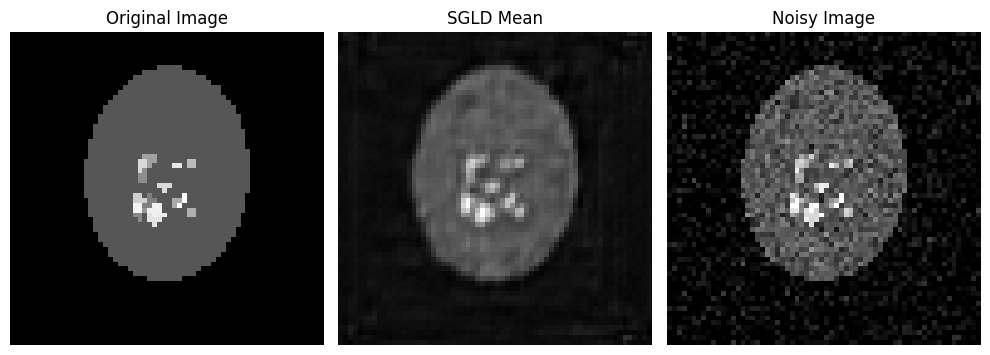

[2023-09-06 04:41:42] Intermediate result: {"iteration": 1700, "loss": 0.00349, "psnr_gt": 25.60164, "psnr": 26.34338}  (Index 68)
[2023-09-06 04:41:45] Intermediate result: {"iteration": 1725, "loss": 0.00343, "psnr_gt": 26.19918, "psnr": 26.37141}  (Index 69)


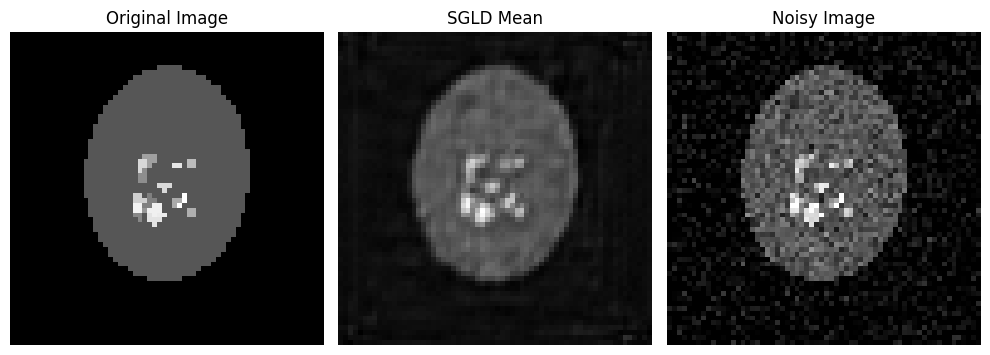

[2023-09-06 04:41:48] Intermediate result: {"iteration": 1750, "loss": 0.00337, "psnr_gt": 25.78133, "psnr": 26.39668}  (Index 70)
[2023-09-06 04:41:51] Intermediate result: {"iteration": 1775, "loss": 0.00321, "psnr_gt": 25.72281, "psnr": 26.41587}  (Index 71)


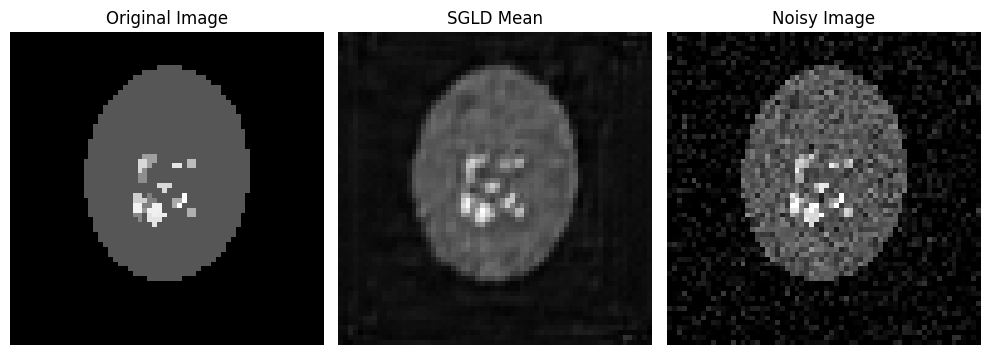

[2023-09-06 04:41:54] Intermediate result: {"iteration": 1800, "loss": 0.0031, "psnr_gt": 26.11859, "psnr": 26.44031}  (Index 72)
[2023-09-06 04:41:57] Intermediate result: {"iteration": 1825, "loss": 0.00318, "psnr_gt": 25.90973, "psnr": 26.45313}  (Index 73)


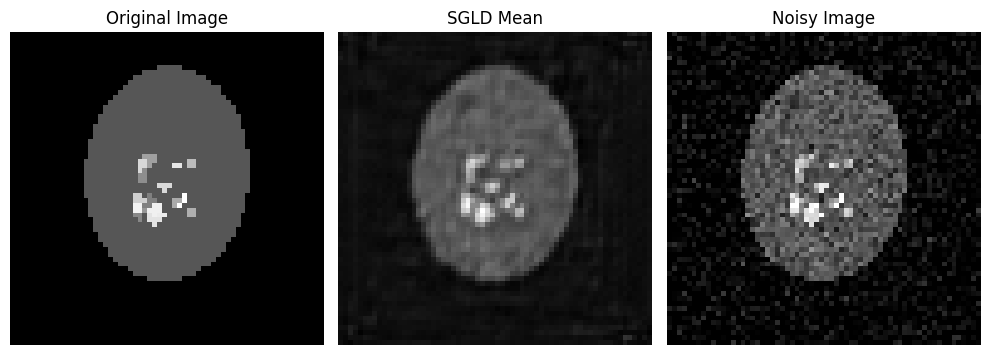

[2023-09-06 04:42:00] Intermediate result: {"iteration": 1850, "loss": 0.00301, "psnr_gt": 25.8591, "psnr": 26.46091}  (Index 74)
[2023-09-06 04:42:03] Intermediate result: {"iteration": 1875, "loss": 0.00287, "psnr_gt": 25.49569, "psnr": 26.46787}  (Index 75)


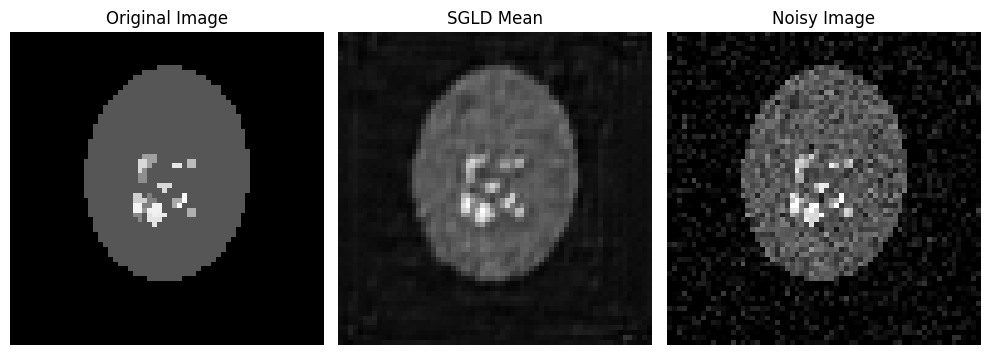

[2023-09-06 04:42:07] Intermediate result: {"iteration": 1900, "loss": 0.00277, "psnr_gt": 25.228, "psnr": 26.48332}  (Index 76)
[2023-09-06 04:42:09] Intermediate result: {"iteration": 1925, "loss": 0.00257, "psnr_gt": 25.79043, "psnr": 26.49606}  (Index 77)


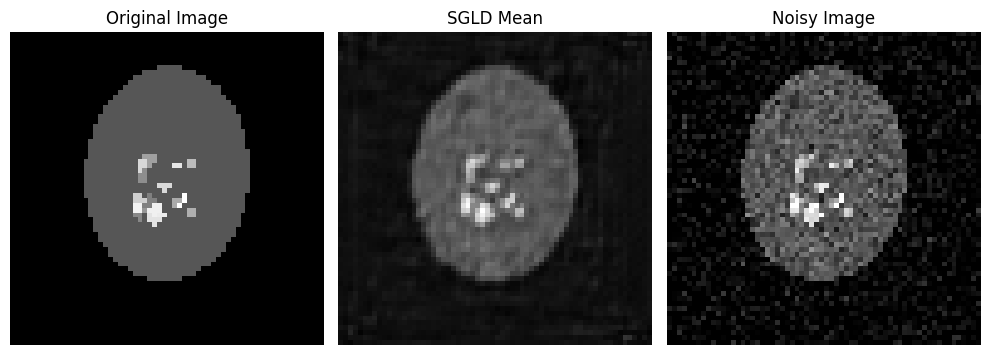

[2023-09-06 04:42:13] Intermediate result: {"iteration": 1950, "loss": 0.00238, "psnr_gt": 25.52787, "psnr": 26.50668}  (Index 78)
[2023-09-06 04:42:15] Intermediate result: {"iteration": 1975, "loss": 0.00234, "psnr_gt": 25.58017, "psnr": 26.51635}  (Index 79)


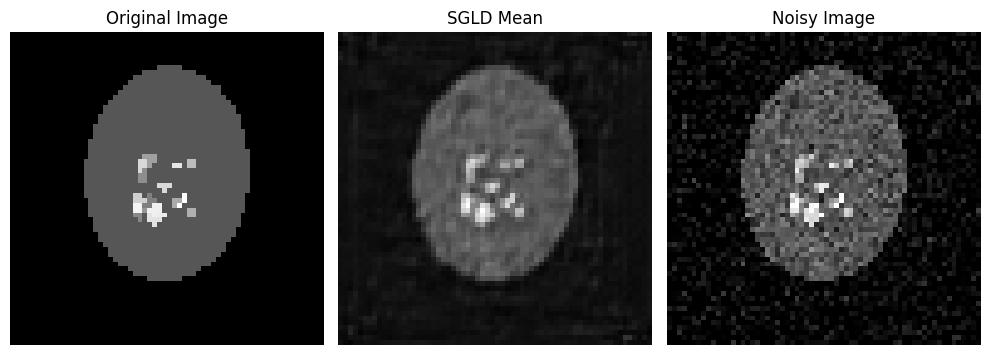

[2023-09-06 04:42:19] Intermediate result: {"iteration": 2000, "loss": 0.00236, "psnr_gt": 25.22491, "psnr": 26.52157}  (Index 80)
[2023-09-06 04:42:22] Intermediate result: {"iteration": 2025, "loss": 0.00207, "psnr_gt": 25.26508, "psnr": 26.52883}  (Index 81)


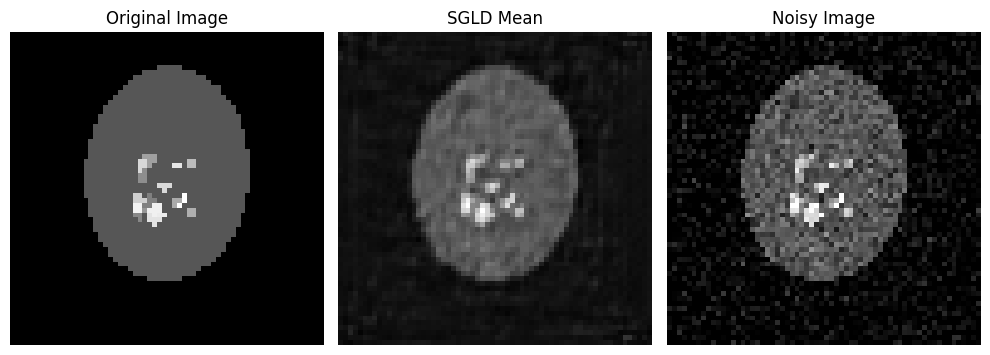

[2023-09-06 04:42:25] Intermediate result: {"iteration": 2050, "loss": 0.00207, "psnr_gt": 25.41977, "psnr": 26.53317}  (Index 82)
[2023-09-06 04:42:28] Intermediate result: {"iteration": 2075, "loss": 0.00187, "psnr_gt": 25.1806, "psnr": 26.53587}  (Index 83)


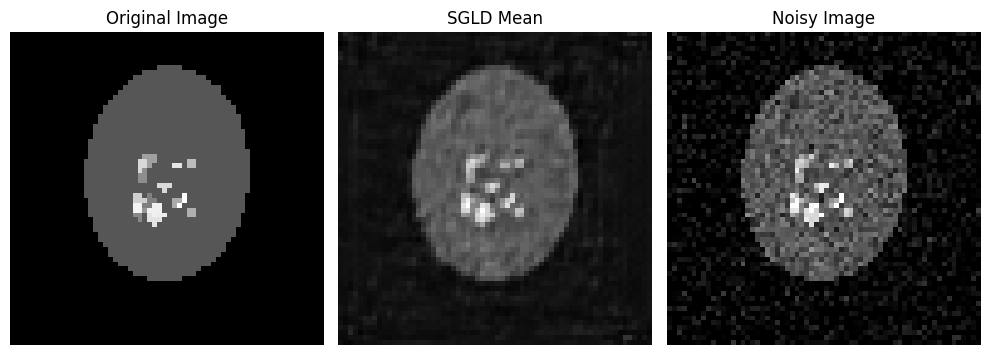

[2023-09-06 04:42:31] Intermediate result: {"iteration": 2100, "loss": 0.00184, "psnr_gt": 25.25723, "psnr": 26.53721}  (Index 84)
[2023-09-06 04:42:34] Intermediate result: {"iteration": 2125, "loss": 0.00189, "psnr_gt": 25.15263, "psnr": 26.53515}  (Index 85)


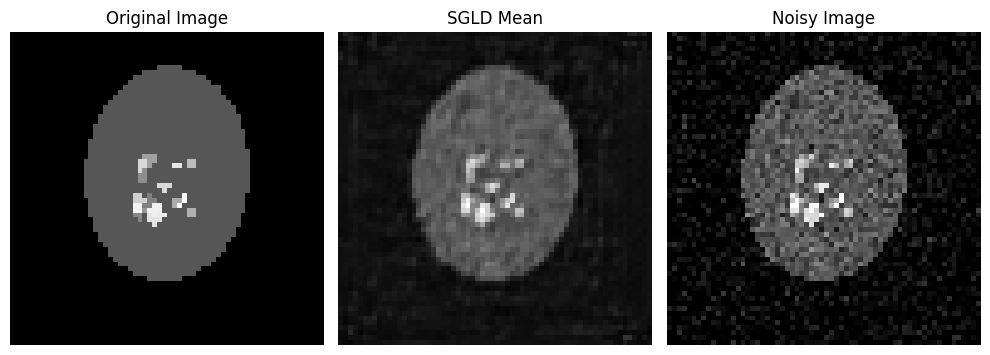

[2023-09-06 04:42:37] Intermediate result: {"iteration": 2150, "loss": 0.00156, "psnr_gt": 24.89969, "psnr": 26.53059}  (Index 86)
[2023-09-06 04:42:40] Intermediate result: {"iteration": 2175, "loss": 0.00136, "psnr_gt": 24.69552, "psnr": 26.52145}  (Index 87)


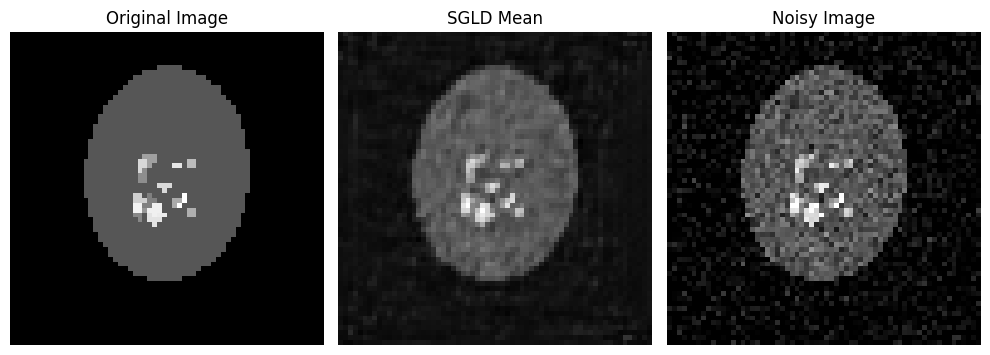

[2023-09-06 04:42:43] Intermediate result: {"iteration": 2200, "loss": 0.00118, "psnr_gt": 24.597, "psnr": 26.50933}  (Index 88)
[2023-09-06 04:42:46] Intermediate result: {"iteration": 2225, "loss": 0.00114, "psnr_gt": 24.69724, "psnr": 26.49522}  (Index 89)


In [3]:
total_iterations = 1200

resolution = 64
noise_type = 'gaussian'
noise_level = '0.09'
phantom =       np.load(f'/home/joe/nas-for-dip/phantoms/ground_truth/{resolution}/{45}.npy')
phantom_noisy = np.load(f'/home/joe/nas-for-dip/phantoms/{noise_type}/res_{resolution}/nl_{noise_level}/p_{45}.npy')

# Create the lightning module
module = Eval_OS(
                phantom=phantom, 
                phantom_noisy=phantom_noisy,
                learning_rate=0.01, 
                buffer_size=100,
                patience=1000,
                weight_decay= 5e-7,

                show_every=200,
                report_every=25,
                )

# Create a PyTorch Lightning trainer
trainer = Trainer(
            max_epochs=total_iterations,
            fast_dev_run=False,
            gpus=1,
            )
            
if not hasattr(trainer, 'optimizer_frequencies'):
    trainer.optimizer_frequencies = []


# Create the lighting object for evaluator
train_loader = DataLoader(SingleImageDataset(phantom, num_iter=1), batch_size=1)
val_loader = DataLoader(SingleImageDataset(phantom, num_iter=1), batch_size=1)

lightning = Lightning(lightning_module=module, trainer=trainer, train_dataloaders=train_loader, val_dataloaders=val_loader)


# Create a Search Space
model_space = DARTS_UNet(depth=4)

# fast_dev_run=False

config = RetiariiExeConfig(execution_engine='oneshot')
experiment = RetiariiExperiment(model_space, evaluator=lightning, strategy=strategy)
experiment.run(config)

In [ ]:
# stop experiment and clear cache
experiment.stop()
torch.cuda.empty_cache()

In [ ]:

exported_arch = experiment.export_top_models()

exported_arch


In [ ]:
# Create the lightning module
from search_eval.eval_no_search_SGLD_ES import Eval_SGLD_ES
module = Eval_SGLD_ES(
                phantom=phantom, 
                phantom_noisy=phantom_noisy,
                learning_rate=0.01, 
                buffer_size=100,
                patience=1000,
                weight_decay= 5e-7,

                show_every=200,
                report_every=25,
                )